In [2]:
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file = '/Users/songchen/Desktop/self/dsu/w25 internal proj/meta_CDs_and_Vinyl.jsonl'

products = [] # store product data

# open JSON file in read mode with UTF-8 encoding
with open(file, 'r', encoding = 'utf-8') as fp:
    for line in fp: # read line by line
        products.append(json.loads(line.strip())) # convert JSON string to dictionary and store in the list

In [6]:
print(f"Loaded {len(products)} products.") # check if it's loaded properly
print(products[:3])  # print first 3 products

Loaded 701959 products.
[{'main_category': 'Digital Music', 'title': 'Release Some Tension', 'average_rating': 4.6, 'rating_number': 112, 'features': [], 'description': ['Swv ~ Release Some Tension'], 'price': 12.05, 'images': [{'thumb': 'https://m.media-amazon.com/images/I/517h9OROQAL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/517h9OROQAL.jpg', 'variant': 'MAIN', 'hi_res': 'https://m.media-amazon.com/images/I/71VRDLrTvYL._SL1500_.jpg'}], 'videos': [], 'store': 'SWV   Format: Audio CD', 'categories': ['CDs & Vinyl', 'Dance & Electronic', 'House'], 'details': {'Is Discontinued By Manufacturer': 'No', 'Product Dimensions': '5.62 x 4.92 x 0.33 inches; 3.84 Ounces', 'Manufacturer': 'Sony Legacy', 'Item model number': '2013033', 'Original Release Date': '1997', 'Run time': '53 minutes', 'Date First Available': 'December 7, 2006', 'Label': 'Sony Legacy', 'Number of discs': '1'}, 'parent_asin': 'B000002X4C', 'bought_together': None}, {'main_category': 'Digital Music', 'title':

In [7]:
# subset all of the info to only include relevant fields
relevant_fields = ['parent_asin','title', 'rating_number', 'features', 'description']
products = [{field:product[field] for field in relevant_fields} for product in products]

# combine features and description and remove unusual characters such as emojis.
for product in products:
    product['combined_description'] = re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(product['description'] + product['features'])).strip().lower()

In [8]:
# get the number of ratings for each product
num_ratings = []

for product in products:
    num_ratings.append(product['rating_number'])
    
num_ratings = np.array(num_ratings)


In [9]:
print(num_ratings[:5]) # check first 5 number of ratings to ensure it's loaded properly

[ 112    1    9 1186    1]


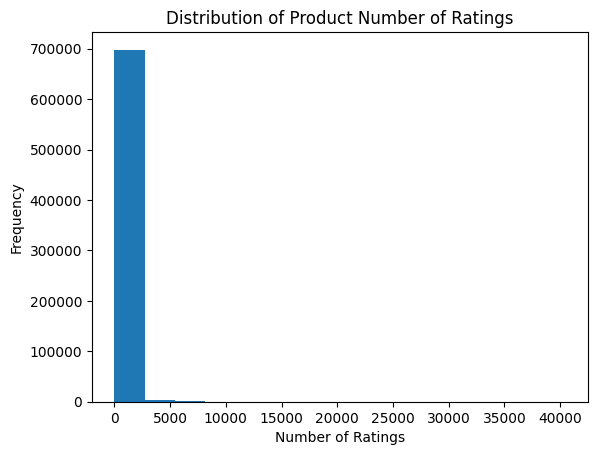

In [10]:
plt.hist(num_ratings, bins = 15)
plt.title('Distribution of Product Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [11]:
# summary statistics for mumber of ratings
print(f"Total Products: {len(num_ratings)}")
print(f"Min: {np.min(num_ratings)}")
print(f"Max: {np.max(num_ratings)}")
print(f"Mean: {np.mean(num_ratings):.2f}")
print(f"Median: {np.median(num_ratings)}")
print(f"90th Percentile: {np.percentile(num_ratings, 90)}")
print(f"95th Percentile: {np.percentile(num_ratings, 95)}")
print(f"99th Percentile: {np.percentile(num_ratings, 99)}")

Total Products: 701959
Min: 1
Max: 40466
Mean: 110.53
Median: 11.0
90th Percentile: 191.0
95th Percentile: 450.0
99th Percentile: 1818.0


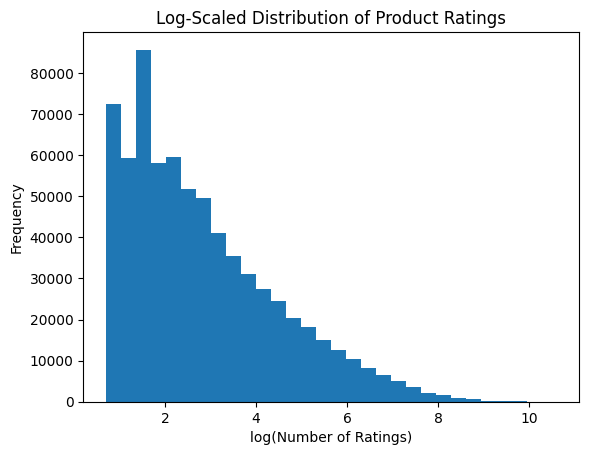

In [12]:
plt.hist(np.log1p(num_ratings), bins = 30)  # log1p avoids log(0) errors
plt.title('Log-Scaled Distribution of Product Ratings')
plt.xlabel('log(Number of Ratings)')
plt.ylabel('Frequency')
plt.show()

ln(1) = 0, ln(10) = 2.3, ln(100) = 4.6, ln(1000) = 6.9, ln(10000) = 9.2

the numbers plugged into the log represent the ratings, so we can see a lot of items have between 1 - 100 ratings

In [13]:
ratings_threshold = 1818
filtered_products = [product for product in products if product['rating_number'] > ratings_threshold]

print(f"There are now {len(filtered_products)} remaining products.")

There are now 7013 remaining products.


In [14]:
lengths = []
has_features = 0
has_description = 0

for product in filtered_products:
    lengths.append(len(product['combined_description']))
    if len(product['features']) > 0:
        has_features += 1
    
    if len(product['description']) > 0:
        has_description += 1
        
lengths = np.array(lengths)

In [15]:
print(f"Proportion of products with features: {has_features / len(filtered_products) * 100}")
print(f"Proportion of products with descriptions: {has_description / len(filtered_products) * 100}")

Proportion of products with features: 0.6844431769570798
Proportion of products with descriptions: 79.33837159560817


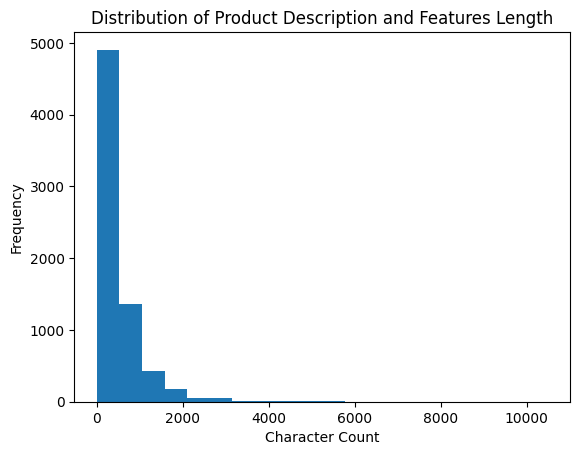

In [16]:
plt.hist(lengths, bins = 20)
plt.title('Distribution of Product Description and Features Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

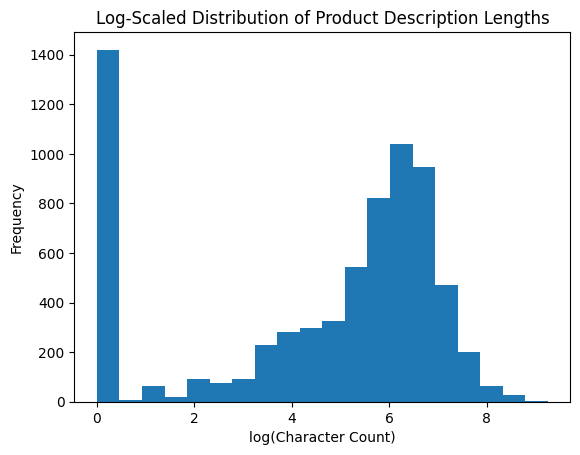

In [17]:
plt.hist(np.log1p(lengths), bins = 20)  # log1p avoids log(0) issues
plt.title('Log-Scaled Distribution of Product Description Lengths')
plt.xlabel('log(Character Count)')
plt.ylabel('Frequency')
plt.show()

ln(1) = 0, ln(10) = 2.3, ln(100) = 4.6, ln(1000) = 6.9, ln(10000) = 9.2

the numbers plugged into the log represent the characters in the feature and description. We can see around 1400 items have none or very short descriptions, but it's concentrated between 100 - 1000 characters.

In [18]:
print(f"Median description length: {np.median(lengths)}")
print(f"90th percentile: {np.percentile(lengths, 90)}")
print(f"95th percentile: {np.percentile(lengths, 95)}")

Median description length: 267.0
90th percentile: 1082.0
95th percentile: 1508.0


In [19]:
description_threshold = 267

final_products = [product for product in filtered_products if len(product['combined_description']) > description_threshold]

print(f"There are now {len(final_products)} remaining products.")

There are now 3502 remaining products.


In [20]:
# sanity check
for product in final_products[:5]:
    print(f"Name: {product['title']}\nDescription: {product['combined_description']}")

Name: Urban Hymns
Description: urban hymns is the 3rd studio album by english rock band the verve released in september 1997 it earned unanimous critical praise upon its release selling over 10 million ww and featuring the singles bitter sweet symphony lucky man and the drugs dont work the album has been remastered for the 20th anniversary
Name: Metallica Remastered
Description: the black albumis one of the most commercially successful and critically acclaimed records of all time with global sales of over 35 million and contains a series of unrelenting singles enter sandman the unforgiven nothing else matterswherever i may roam and sad but true remastered by bob ludwig at gateway mastering and overseen by executive producer greg fidelmanremastered edition of metallica on cd
Name: In Through the out Door
Description: on its release in the summer of 1979 in through the out door topped the us and uk album charts and has since been certified sixtimes platinum sadly it would be the last alb

In [21]:
product_df = pd.DataFrame(final_products)
product_df = product_df[['parent_asin', 'title', 'combined_description']]
product_df.columns = ['id', 'title', 'description']

In [22]:
print(product_df)

              id                                              title  \
0     B073LP9GRN                                        Urban Hymns   
1     B097CFN5W4                               Metallica Remastered   
2     B00YB9BL7W                            In Through the out Door   
3     B008L1PYQU                             Destroyer: Resurrected   
4     B000007WOP                                        Urban Hymns   
...          ...                                                ...   
3497  B0009VNCPU                        Classic Albums: Joshua Tree   
3498  B09H8SG53R  Enter The Wu Tang 36 Chambers - Exclusive Limi...   
3499  B00C3MGJVC                                                  a   
3500  B012SX6PW8   Straight Outta Compton Hat       Explicit Lyrics   
3501  B089PYTVSP  Chromatica - Exclusive Limited Edition Clear C...   

                                            description  
0     urban hymns is the 3rd studio album by english...  
1     the black albumis one of 

In [23]:
product_df.to_csv('cds_vinyl_product.csv', index = False)